# Implementing K-Means using Scikit-Learn

Scikit-Learn provides the `sklearn.cluster` module to enable K-Means Clustering analysis, which you can import.

```py
from sklearn.cluster import KMeans
```

1. create a model and specfiy the number of clusters, `k`.

```py
model = KMeans(n_clusters = k)
```

2. use the `fit()` method to compute K-Means clustering, passing in our dataset `X`.

```py
model.fit(X)
```

3. we can now predict the closest cluster each sample in `X` belongs to, and obtain the labels for the cluster samples

```py
labels = model.predict(X)
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
samples = iris.data

# Use KMeans() to create a model that finds 3 clusters
model = KMeans(n_clusters = 3)

# Use .fit() to fit the model to samples
model.fit(samples)

# Use .predict() to predict the labels for samples
# we can get the actual labels using iris.target 
labels = model.predict(samples) 

# Print the labels
print(labels)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


With this model, we can now 'feed it' new data samples and predict their labels using the `predict()` method.

Note: Since the cluster centroids are randomly initialized, running the model repeatedly can produce different clusters with the same input data.

Text(0,0.5,'petal length (cm)')

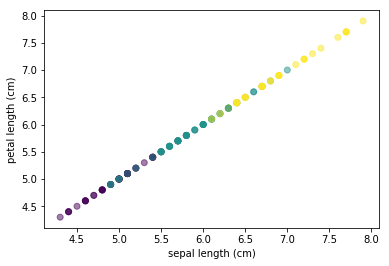

In [2]:
new_samples = np.array([[5.7, 4.4, 1.5, 0.4], [6.5, 3. , 5.5, 0.4], [5.8, 2.7, 5.1, 1.9]])
new_labels = model.predict(new_samples) # predict labels
# print(new_labels) # [0 2 2]

# We can now plot are results, using the `labels` numbers as the colours.
x = samples[:, 0]
y = samples[:, 0]
plt.scatter(x, y, c=labels, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

### Do the clusters correspond to the actual Species

We can get the actual labels for the iris dataset:

In [3]:
target = iris.target
print(target)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


According to the metadata:

 - `0`'s are Iris-setosa
 - `1`'s are Iris-versicolor
 - `2`'s are Iris-virginica
 
We can change the target values to the actual species: 

In [4]:
species = np.chararray(target.shape, itemsize=150)

for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2: 
    species[i] = 'virginica'
  

We will use the Pandas library to perform a cross-tabulation. Cross-tabulations enable you to examine relationships within the data that might not be readily apparent when analyzing total survey responses.

In [5]:
df = pd.DataFrame({'labels': labels, 'species': species}) 
print(df)

     labels       species
0         0     b'setosa'
1         0     b'setosa'
2         0     b'setosa'
3         0     b'setosa'
4         0     b'setosa'
5         0     b'setosa'
6         0     b'setosa'
7         0     b'setosa'
8         0     b'setosa'
9         0     b'setosa'
10        0     b'setosa'
11        0     b'setosa'
12        0     b'setosa'
13        0     b'setosa'
14        0     b'setosa'
15        0     b'setosa'
16        0     b'setosa'
17        0     b'setosa'
18        0     b'setosa'
19        0     b'setosa'
20        0     b'setosa'
21        0     b'setosa'
22        0     b'setosa'
23        0     b'setosa'
24        0     b'setosa'
25        0     b'setosa'
26        0     b'setosa'
27        0     b'setosa'
28        0     b'setosa'
29        0     b'setosa'
..      ...           ...
120       2  b'virginica'
121       1  b'virginica'
122       2  b'virginica'
123       1  b'virginica'
124       2  b'virginica'
125       2  b'virginica'
126       1 

Use the the crosstab() method to perform cross-tabulation:

In [6]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0               50              0             0
1                0             48            14
2                0              2            36
